# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')

# Reading csv file

In [2]:
df = pd.read_csv('new_dataset.csv')
df

,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
1,Rainy,Hot,High,t,no
2,Overcast,Hot,High,f,yes
3,Sunny,Mild,High,f,yes
4,Sunny,Cool,Normal,f,yes
5,Sunny,Cool,Normal,t,no
6,Overcast,Cool,Normal,t,yes
7,Rainy,Mild,High,f,no
8,Rainy,Cool,Normal,f,yes
9,Sunny,Mild,Normal,f,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Outlook   14 non-null     object
 1   Temp      14 non-null     object
 2   Humidity  14 non-null     object
 3   Windy     14 non-null     object
 4   Play      14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [4]:
df.columns

Index(['Outlook', 'Temp', 'Humidity', 'Windy', 'Play'], dtype='object')

In [5]:
df.describe()

,Outlook,Temp,Humidity,Windy,Play
count,14,14,14,14,14
unique,3,3,2,2,2
top,Rainy,Mild,High,f,yes
freq,5,6,8,8,9


# Check Missing Values

In [6]:
df.nunique()

Outlook     3
Temp        3
Humidity    2
Windy       2
Play        2
dtype: int64

In [7]:
df.isnull().sum()

Outlook     0
Temp        0
Humidity    0
Windy       0
Play        0
dtype: int64

<AxesSubplot:>

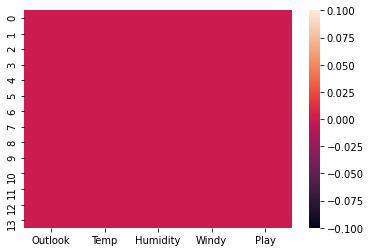

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.head()

,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
1,Rainy,Hot,High,t,no
2,Overcast,Hot,High,f,yes
3,Sunny,Mild,High,f,yes
4,Sunny,Cool,Normal,f,yes


# Dummies Variable

### 1. Dummies variable using(Outlook)

In [10]:
df['Outlook'].unique()

array(['Rainy', 'Overcast', 'Sunny'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
OutlookEncoder = LabelEncoder()
OutlookEncoder.fit(df['Outlook'])

LabelEncoder()

In [13]:
OutlookEncoder.classes_

array(['Overcast', 'Rainy', 'Sunny'], dtype=object)

In [14]:
df['Outlook'] = OutlookEncoder.transform(df['Outlook'])

In [15]:
df['Outlook'].unique()

array([1, 0, 2])

### 2. Dummies variable using(Temp)

In [16]:
df['Temp'].unique()

array(['Hot', 'Mild', 'Cool'], dtype=object)

In [17]:
TempEncoder = LabelEncoder()
TempEncoder.fit(df['Temp'])

LabelEncoder()

In [18]:
TempEncoder.classes_

array(['Cool', 'Hot', 'Mild'], dtype=object)

In [19]:
df['Temp'] = TempEncoder.transform(df['Temp'])

In [20]:
df['Temp'].unique()

array([1, 2, 0])

### 3. Dummies variable using(Humidity)

In [21]:
df['Humidity'].unique()

array(['High', 'Normal'], dtype=object)

In [22]:
HumidityEncoder = LabelEncoder()
HumidityEncoder.fit(df['Humidity'])

LabelEncoder()

In [23]:
HumidityEncoder.classes_

array(['High', 'Normal'], dtype=object)

In [24]:
df['Humidity'] = HumidityEncoder.transform(df['Humidity'])

In [25]:
df['Humidity'].unique()

array([0, 1])

### 4. Dummies variable using(Windy)

In [26]:
df['Windy'].unique()

array(['f', 't'], dtype=object)

In [27]:
WindyEncoder = LabelEncoder()
WindyEncoder.fit(df['Windy'])

LabelEncoder()

In [28]:
WindyEncoder.classes_

array(['f', 't'], dtype=object)

In [29]:
df['Windy'] = WindyEncoder.transform(df['Windy'])

In [30]:
df['Windy'].unique()

array([0, 1])

### 5. Dummies variable using(Play)

In [31]:
df['Play'].unique()

array(['no', 'yes'], dtype=object)

In [32]:
PlayEncoder = LabelEncoder()
PlayEncoder.fit(df['Play'])

LabelEncoder()

In [33]:
PlayEncoder.classes_

array(['no', 'yes'], dtype=object)

In [34]:
df['Play'] = PlayEncoder.transform(df['Play'])

In [35]:
df['Play'].unique()

array([0, 1])

In [36]:
df.head()

,Outlook,Temp,Humidity,Windy,Play
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1


In [37]:
df.columns

Index(['Outlook', 'Temp', 'Humidity', 'Windy', 'Play'], dtype='object')

In [38]:
df.corr()['Play'].sort_values(ascending=False)

Play        1.000000
Humidity    0.344265
Temp       -0.051131
Windy      -0.258199
Outlook    -0.306667
Name: Play, dtype: float64

<AxesSubplot:>

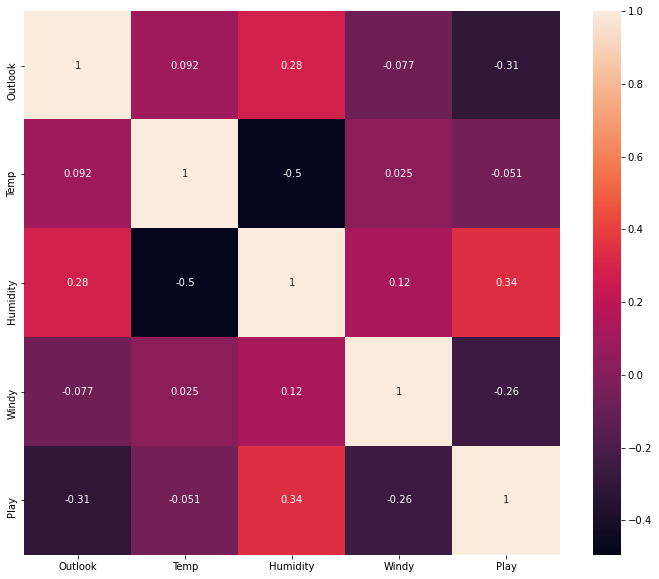

In [39]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

# Deciding x and y

In [40]:
x = df[['Outlook', 'Temp', 'Humidity', 'Windy']]
y = df['Play']

# Train-Test-Split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [43]:
x_train

,Outlook,Temp,Humidity,Windy
11,0,2,0,1
1,1,1,0,1
6,0,0,1,1
13,2,2,0,1
4,2,0,1,0
3,2,2,0,0
7,1,2,0,0
10,1,2,1,1
0,1,1,0,0
2,0,1,0,0


# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lg = LogisticRegression()

In [46]:
lg.fit(x_train, y_train)

LogisticRegression()

In [47]:
predictions = lg.predict(x_test)

In [48]:
predictions

array([1, 1, 1, 1])

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

In [50]:
confusion_matrix(y_test, predictions)

array([[0, 1],
       [0, 3]])

In [51]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



# KNeighbors Classifier

In [52]:
max_value = None
for num in df:
    if (max_value is None or num > max_value):
        max_value = num
        
print('Maximum value: ', max_value)

Maximum value:  Windy


In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier(7)

In [55]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [56]:
kPredictions = knn.predict(x_test)

In [57]:
print(classification_report(y_test, kPredictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.67      0.67         3

    accuracy                           0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4



# Applying the Gaussion Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB

In [59]:
classifier = GaussianNB()

In [60]:
classifier.fit(x_train, y_train)

GaussianNB()

In [61]:
y_pred = classifier.predict(x_test)

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
cm = confusion_matrix(y_test, y_pred)

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.67      0.67         3

    accuracy                           0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4



In [65]:
classifier = GaussianNB()

In [66]:
classifier.fit(x_train, y_train)

GaussianNB()

In [67]:
from xgboost import XGBClassifier

In [68]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

[15:53:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
predictions = xgb.predict(x_test)

In [70]:
predictions

array([1, 1, 1, 1])

In [71]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



# Finalising the Algorithm

In [77]:
import pickle
pickle.dump(xgb, open('Model.pkl', 'wb'))

In [78]:
savedModel = pickle.load(open('Model.pkl', 'rb'))

In [79]:
x.columns

Index(['Outlook', 'Temp', 'Humidity', 'Windy'], dtype='object')

In [80]:
testArr = np.array([[0, 2, 0, 0]])

In [81]:
testCol = savedModel.get_booster().feature_names

In [82]:
testDf = pd.DataFrame(data=testArr, columns=testCol)
testDf

,Outlook,Temp,Humidity,Windy
0,0,2,0,0


In [83]:
xgb.predict(testDf)

array([1])

In [79]:
accuracy

NameError: name 'accuracy' is not defined